In [ ]:
!pip install transformers numpy torch sklearn

In [ ]:
# install required packages
import pandas as pd
import os
import torch
from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification
from transformers import Trainer, TrainingArguments
import numpy as np
import random
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

In [ ]:
#connect google drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
#load training and test data with labels
training_text = pd.read_csv('/gdrive/MyDrive/kaggle/Machathon final round/train_ara.csv')
testing_text = pd.read_csv('/gdrive/MyDrive/kaggle/Machathon final round/test.csv')
labels_text=training_text["intent"].unique()

In [ ]:
print(labels_text)
print(labels_text.shape[0])

['business location' 'nothing identified' 'the evolution of the virus'
 'infected cases' 'crush' 'treatment' 'most vulnerable' 'transfer methods'
 'sterilization and disinfection' 'greeting' 'precautions' 'symptoms'
 'warm weather' 'reviews' 'assessment' 'about corona virus'
 'panic among the people' 'muzzle/mask' 'kindness' 'emergency'
 'laboratory' 'prayers' 'smoking' 'no' 'how are you' 'comparison'
 'about bot' 'food and drinks' 'education and work' 'spoken languages'
 'back to work' 'home quarantine' 'gloves' 'curfew' 'breathing test'
 'about business' 'end conversation' 'yes' 'infection by animals'
 'disease detection']
40


In [ ]:
training_text

,text,intent
0,كم عدد مستشفيات العزل فى مصر وما هى اماكنها,business location
1,ومخاصمك,nothing identified
2,متي ينتهي كورونا؟,the evolution of the virus
3,انا اسف,nothing identified
4,كام عدد الوفيات النهارده,infected cases
...,...,...
786,اهلا,greeting
787,بلح,nothing identified
788,كم عدد الحالات,infected cases
789,متى ينتهى فيروس كورونا,the evolution of the virus


In [ ]:
#tokenizer = AutoTokenizer.from_pretrained("UBC-NLP/MARBERT")

In [ ]:
#model = AutoModelForSequenceClassification.from_pretrained("UBC-NLP/MARBERT", num_labels=len(labels_text)).to("cuda")

In [ ]:
#load model and tokenizer
model_path = "/gdrive/MyDrive/kaggle/Machathon final round/final classifier"
model=AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=len(labels_text)).to("cuda")
tokenizer=AutoTokenizer.from_pretrained(model_path)

In [ ]:
def get_prediction(text):
    # prepare our text into tokenized sequence
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt").to("cuda")
    # perform inference to our model
    outputs = model(**inputs)
    # get output probabilities by doing softmax
    probs = outputs[0].softmax(1)
    # executing argmax function to get the candidate label
    return probs.argmax()

In [ ]:
#add model predections to a numpy array
predictions=[]
uniq=list(labels_text)
for index, row in testing_text.iterrows():
  predictions.append([index,uniq[get_prediction(row["text"]).item()]])
predictions=np.array(predictions)

In [ ]:
pd.DataFrame(predictions, columns = ['index', 'intent']).to_csv("/gdrive/MyDrive/kaggle/Machathon final round/final classifier/pred.csv", index=False)

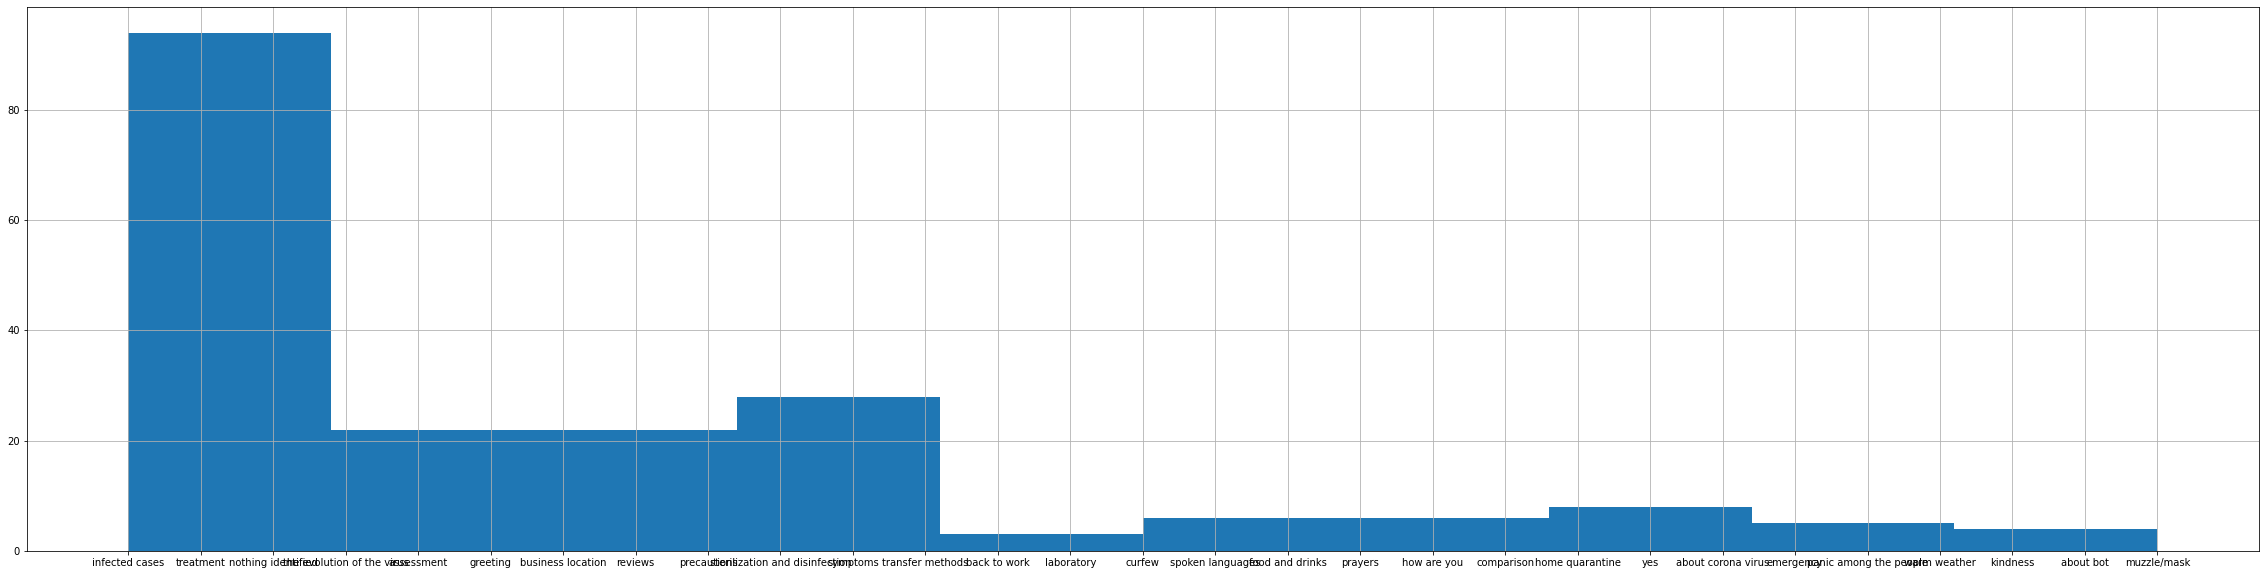

In [ ]:
#plot model predictions against different labels
out=[]
for i in predictions:
  out.append(i[1])
pd.Series(out).hist(bins = 10,figsize=(40,10))